In [1]:
import pandas as pd
import numpy as np

train = pd.read_csv('E:\\Kaggle_Practise\\TitanicSurvivalAnalysis\\train.csv')
test = pd.read_csv('E:\\Kaggle_Practise\\TitanicSurvivalAnalysis\\test.csv')

In [2]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#check input data set size
print("Train Shape:{} | Test Shape:{}".format(train.shape,test.shape))

Train Shape:(891, 12) | Test Shape:(418, 11)


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# check nulls
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() #setting seaborn default for plots

In [10]:
# find the categorical variable in train dataset
categorical = [var for var in train.columns if train[var].dtype == 'O']
print("There are {} categorical variables in Train dataset\n",len(categorical))
print("The categorical variables are :",categorical)

There are {} categorical variables in Train dataset
 5
The categorical variables are : ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [11]:
train[categorical].head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


In [12]:
# explore the missing values in categorical variables
train[categorical].isnull().sum()

Name          0
Sex           0
Ticket        0
Cabin       687
Embarked      2
dtype: int64

In [13]:
# print the categorical variables only containing missing values
cat1 = [var for var in categorical if train[var].isnull().sum() != 0]
print(train[cat1].isnull().sum())

Cabin       687
Embarked      2
dtype: int64


In [14]:
#frequency count of categorical variables
for var in categorical:
    print(train[var].value_counts())

Sedgwick, Mr. Charles Frederick Waddington    1
Thayer, Mr. John Borland                      1
Frolicher, Miss. Hedwig Margaritha            1
Berglund, Mr. Karl Ivar Sven                  1
Albimona, Mr. Nassef Cassem                   1
                                             ..
Laleff, Mr. Kristo                            1
Emir, Mr. Farred Chehab                       1
Doling, Mrs. John T (Ada Julia Bone)          1
Jussila, Miss. Mari Aina                      1
Perreault, Miss. Anne                         1
Name: Name, Length: 891, dtype: int64
male      577
female    314
Name: Sex, dtype: int64
347082             7
1601               7
CA. 2343           7
3101295            6
347088             6
                  ..
112379             1
11753              1
28228              1
113784             1
S.C./A.4. 23567    1
Name: Ticket, Length: 681, dtype: int64
C23 C25 C27    4
B96 B98        4
G6             4
F33            3
E101           3
              ..
C106     

In [15]:
# check for cardinality in categorical variables
for var in categorical:
    print(var,' contains ',len(train[var].unique()),' labels ')

Name  contains  891  labels 
Sex  contains  2  labels 
Ticket  contains  681  labels 
Cabin  contains  148  labels 
Embarked  contains  4  labels 


In [16]:
#Explore the numerical variables
numerical = [var for var in train.columns if train[var].dtype != 'O']
print("There are {} numerical variables".format(len(numerical)))
print("The numerical variables are :",numerical)

There are 7 numerical variables
The numerical variables are : ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [17]:
train[numerical].head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [18]:
#check missing values
train[numerical].isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

In [19]:
#check outliers in numerical variables
print(round(train[numerical].describe(),2))

       PassengerId  Survived  Pclass     Age   SibSp   Parch    Fare
count       891.00    891.00  891.00  714.00  891.00  891.00  891.00
mean        446.00      0.38    2.31   29.70    0.52    0.38   32.20
std         257.35      0.49    0.84   14.53    1.10    0.81   49.69
min           1.00      0.00    1.00    0.42    0.00    0.00    0.00
25%         223.50      0.00    2.00   20.12    0.00    0.00    7.91
50%         446.00      0.00    3.00   28.00    0.00    0.00   14.45
75%         668.50      1.00    3.00   38.00    1.00    0.00   31.00
max         891.00      1.00    3.00   80.00    8.00    6.00  512.33


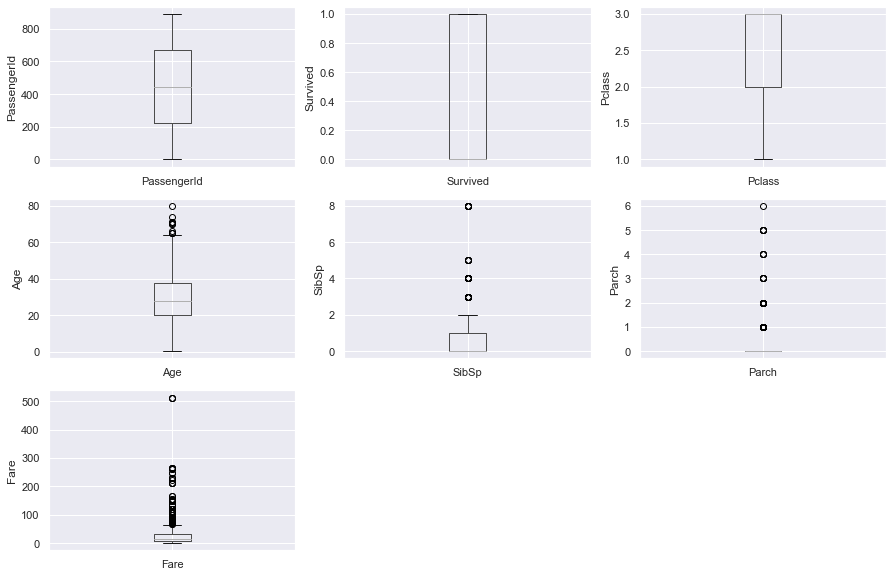

In [20]:
#draw boxplot to visualize outliers
plt.figure(figsize=(15,10))

n=0
for i in train[numerical]:
    n += 1
    plt.subplot(3,3,n)
    fig = train.boxplot(column=i)
    fig.set_title('')
    fig.set_ylabel(i)

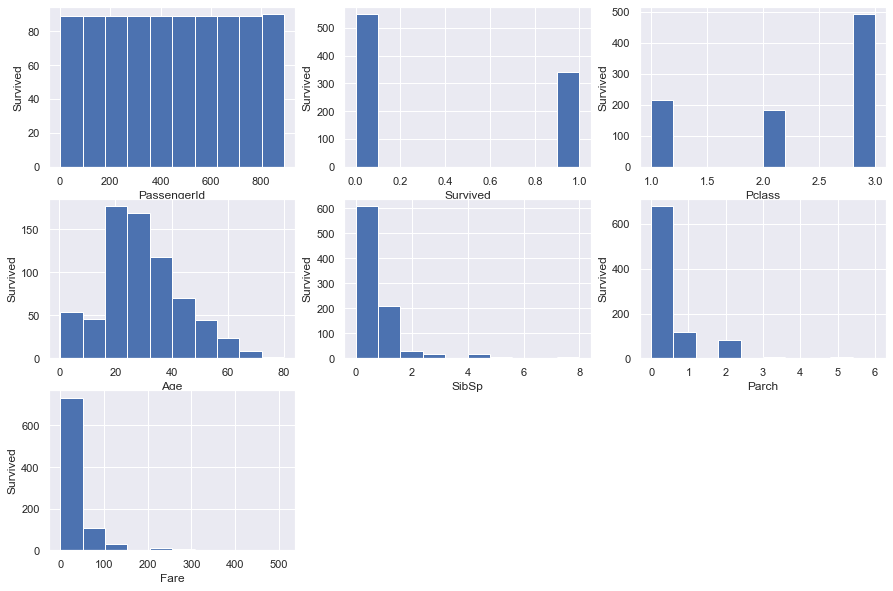

In [21]:
#plot histograms to check distribution
plt.figure(figsize=(15,10))


n=0
for i in train[numerical]:
    n += 1
    plt.subplot(3,3,n)
    fig = train[i].hist(bins=10)
    fig.set_xlabel(i)
    fig.set_ylabel('Survived')

In [22]:
#Find Outliers
IQR = train.Fare.quantile(0.75)-train.Fare.quantile(0.25)
Lower_fence = train.Fare.quantile(0.25) - (IQR * 3)
Upper_fence = train.Fare.quantile(0.75) + (IQR * 3)
print('Fare outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary = Lower_fence, upperboundary = Upper_fence))

Fare outliers are values < -61.358399999999996 or > 100.2688


In [23]:
#Data visualization using matplotlib and seaborn libraries
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df=pd.DataFrame([survived,dead])
    df.index=['Survived','Dead']
    df.plot(kind='bar',stacked=True,figsize=(10,5))

Survived :
 female    233
male      109
Name: Sex, dtype: int64
Dead:
 male      468
female     81
Name: Sex, dtype: int64


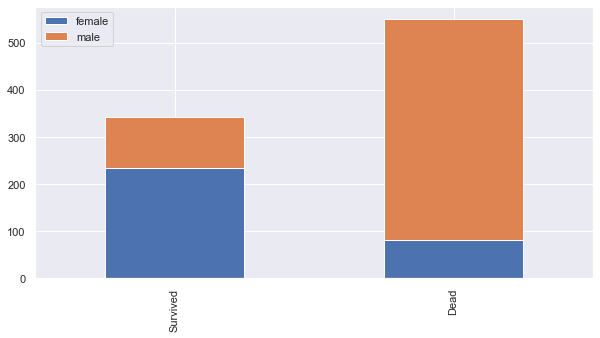

In [24]:
bar_chart('Sex')
print("Survived :\n",train[train['Survived']==1]['Sex'].value_counts())
print("Dead:\n",train[train['Survived']==0]['Sex'].value_counts())

Survived :
 1    136
3    119
2     87
Name: Pclass, dtype: int64
Dead:
 3    372
2     97
1     80
Name: Pclass, dtype: int64


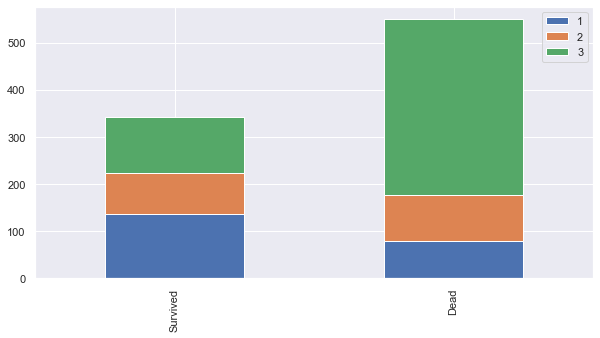

In [25]:
bar_chart('Pclass')
print("Survived :\n",train[train['Survived']==1]['Pclass'].value_counts())
print("Dead:\n",train[train['Survived']==0]['Pclass'].value_counts())

Survived :
 0    210
1    112
2     13
3      4
4      3
Name: SibSp, dtype: int64
Dead:
 0    398
1     97
4     15
2     15
3     12
8      7
5      5
Name: SibSp, dtype: int64


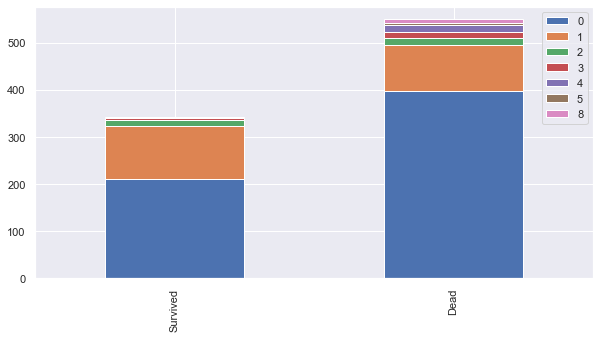

In [26]:
bar_chart('SibSp')
print("Survived :\n",train[train['Survived']==1]['SibSp'].value_counts())
print("Dead:\n",train[train['Survived']==0]['SibSp'].value_counts())

Survived :
 0    233
1     65
2     40
3      3
5      1
Name: Parch, dtype: int64
Dead:
 0    445
1     53
2     40
5      4
4      4
3      2
6      1
Name: Parch, dtype: int64


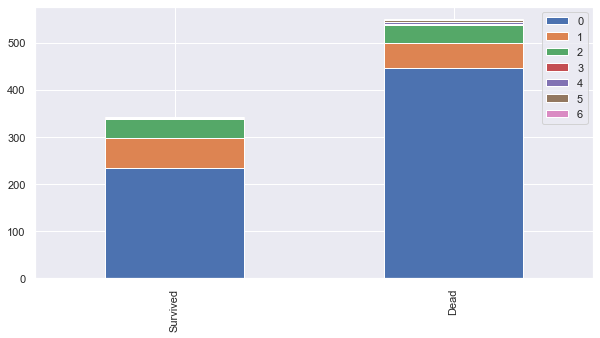

In [27]:
bar_chart('Parch')
print("Survived :\n",train[train['Survived']==1]['Parch'].value_counts())
print("Dead:\n",train[train['Survived']==0]['Parch'].value_counts())

Survived :
 S    217
C     93
Q     30
Name: Embarked, dtype: int64
Dead:
 S    427
C     75
Q     47
Name: Embarked, dtype: int64


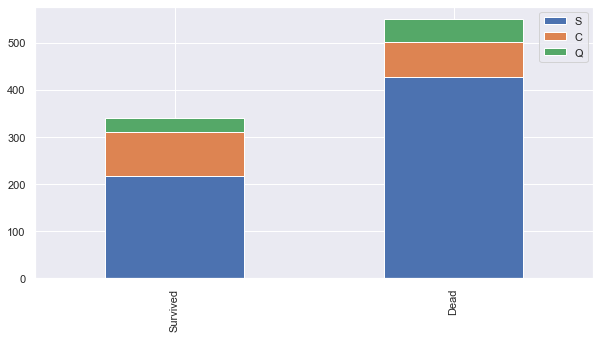

In [28]:
bar_chart('Embarked')
print("Survived :\n",train[train['Survived']==1]['Embarked'].value_counts())
print("Dead:\n",train[train['Survived']==0]['Embarked'].value_counts())

In [29]:
#Feature Engineering
#Title
train_test_data = [train,test]
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.',expand=False)

In [30]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Sir           1
Ms            1
Capt          1
Jonkheer      1
Don           1
Countess      1
Mme           1
Lady          1
Name: Title, dtype: int64

In [31]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dona        1
Dr          1
Ms          1
Name: Title, dtype: int64

In [32]:
#Title Mapping
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset["Title"].map(title_mapping)

In [33]:
dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


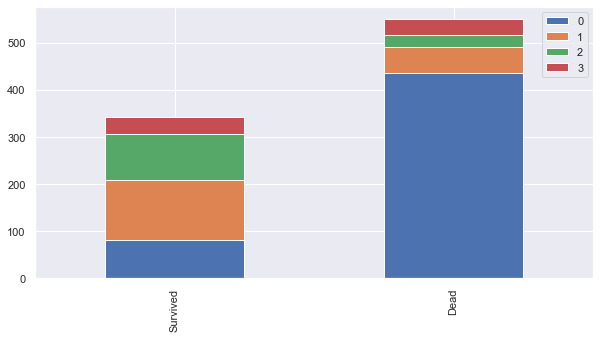

In [34]:
bar_chart('Title')

In [35]:
#delete name feature
train.drop('Name',axis=1,inplace=True)
test.drop('Name',axis=1,inplace=True)

In [36]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [37]:
#Sex Mapping
sex_mapping = {"male":0,"female":1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

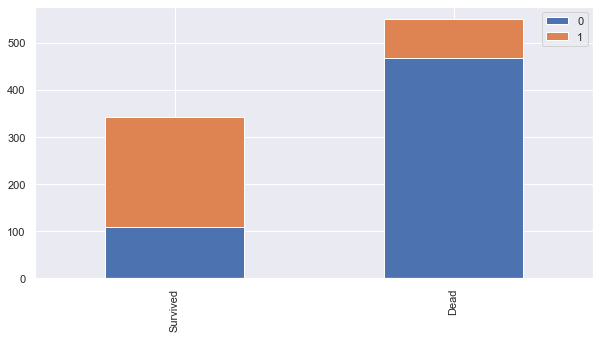

In [38]:
bar_chart('Sex')

In [39]:
#Age - Fill null values with median values
train['Age'].fillna(train.groupby("Title")["Age"].transform("median"),inplace=True)
test['Age'].fillna(test.groupby("Title")["Age"].transform("median"),inplace=True)

In [40]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


In [41]:
#Map the value of Age
train['Age'] = train['Age'].astype(int)
train.loc[train['Age'] <= 16,'Age'] = 0
train.loc[((train['Age'] > 16) & (train['Age'] <= 26)),'Age'] = 1
train.loc[((train['Age'] > 26) & (train['Age'] <= 36)),'Age'] = 2
train.loc[((train['Age'] > 36) & (train['Age'] <= 62)),'Age'] = 3
train.loc[ train['Age'] > 62,'Age'] = 4

In [42]:
test['Age'] = test['Age'].astype(int)
test.loc[test['Age'] <= 16,'Age'] = 0
test.loc[((test['Age'] > 16) & (test['Age'] <= 26)),'Age'] = 1
test.loc[((test['Age'] > 26) & (test['Age'] <= 36)),'Age'] = 2
test.loc[((test['Age'] > 36) & (test['Age'] <= 62)),'Age'] = 3
test.loc[ test['Age'] > 62,'Age'] = 4

In [43]:
train.Age.describe()

count    891.000000
mean       1.712682
std        0.971762
min        0.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: Age, dtype: float64

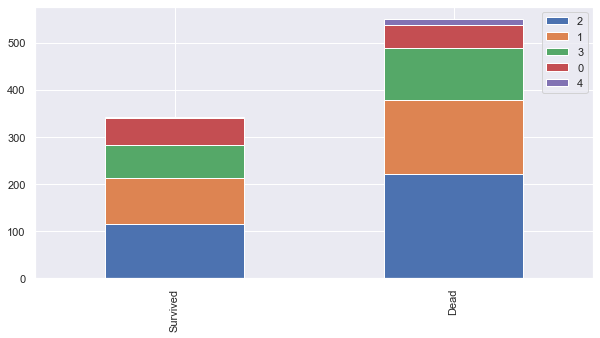

In [44]:
bar_chart('Age')

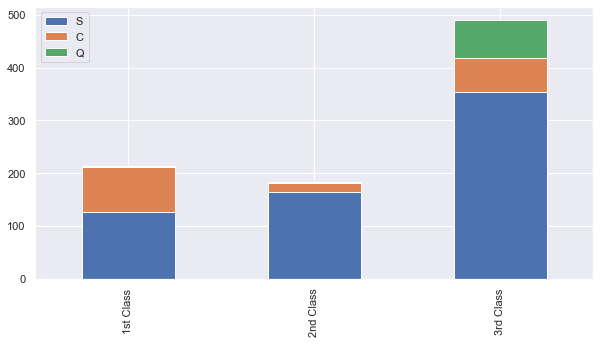

Pclass1:
 S    127
C     85
Q      2
Name: Embarked, dtype: int64
Pclass2:
 S    164
C     17
Q      3
Name: Embarked, dtype: int64
Pclass3:
 S    353
Q     72
C     66
Name: Embarked, dtype: int64


In [45]:
#Map the value of PClass
Pclass1 = train[train['Pclass'] == 1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass'] == 2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass'] == 3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index = ['1st Class','2nd Class','3rd Class']
df.plot(kind = 'bar', stacked =  True, figsize=(10,5))
plt.show()
print("Pclass1:\n",Pclass1)
print("Pclass2:\n",Pclass2)
print("Pclass3:\n",Pclass3)

In [46]:
#Map the value of Embarked
for dataset in train_test_data:
    dataset['Embarked'] =  dataset['Embarked'].fillna('S')
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2,0,0,373450,8.0500,NaN,S,0


In [47]:
#Map the Embarked column values
embarked_mapping = {'S':0,'C':1,'Q':2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [49]:
#Fill na values for Fare
train['Fare'].fillna(train.groupby("Pclass")["Fare"].transform("median"),
                    inplace = True)
test['Fare'].fillna(test.groupby("Pclass")["Fare"].transform("median"),
                    inplace = True)

In [51]:
#Binning of Fare values
for dataset in train_test_data:
    dataset.loc[dataset['Fare'] <= 17, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2
    dataset.loc[dataset['Fare'] >= 100, 'Fare'] = 3

In [52]:
train['Fare'].describe()

count    891.000000
mean       0.765432
std        0.971490
min        0.000000
25%        0.000000
50%        0.000000
75%        2.000000
max        3.000000
Name: Fare, dtype: float64

In [56]:
train.Cabin.value_counts().head()

C23 C25 C27    4
B96 B98        4
G6             4
F33            3
E101           3
Name: Cabin, dtype: int64

In [57]:
for dataset in train_test_data:
    dataset['Cabin'] =  dataset['Cabin'].str[:1]

In [59]:
train.Cabin.value_counts().head()

C    59
B    47
D    33
E    32
A    15
Name: Cabin, dtype: int64

<AxesSubplot:>

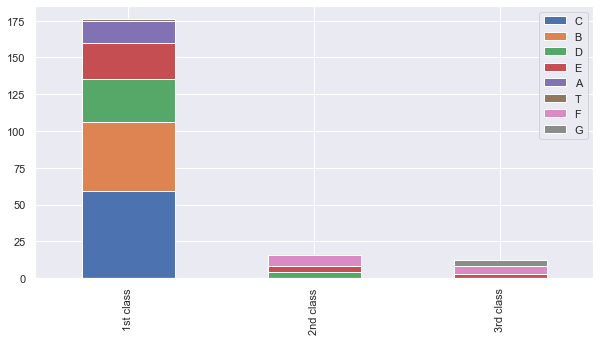

In [60]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [61]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [62]:
# fill missing Fare with median fare for each Pclass
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [63]:
# Map the family size
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

In [64]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [65]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,1,3,1,0,PC 17599,2.0,0.8,1,2,0.4
2,3,1,3,1,1,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,1,2,1,0,113803,2.0,0.8,0,2,0.4
4,5,0,3,0,2,0,0,373450,0.0,2.0,0,0,0.0


In [66]:
features_drop = ['Ticket','SibSp','Parch']
train = train.drop(features_drop,axis=1)
test = test.drop(features_drop,axis=1)
train = train.drop(['PassengerId'],axis=1)

In [67]:
train_data = train.drop('Survived',axis=1)
target = train['Survived']
train_data.shape, target.shape

((891, 8), (891,))

In [68]:
train_data.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1,0.0,2.0,0,0,0.4
1,1,1,3,2.0,0.8,1,2,0.4
2,3,1,1,0.0,2.0,0,1,0.0
3,1,1,2,2.0,0.8,0,2,0.4
4,3,0,2,0.0,2.0,0,0,0.0


In [70]:
#Modelling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import (DecisionTreeClassifier,ExtraTreeClassifier)
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier, 
GradientBoostingClassifier)
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [71]:
#Cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10,shuffle=True,random_state=0)

In [76]:
clf = [KNeighborsClassifier(n_neighbors=13),DecisionTreeClassifier(),
      RandomForestClassifier(n_estimators=13),GaussianNB(),SVC(),
      ExtraTreeClassifier(),
      GradientBoostingClassifier(n_estimators=10,learning_rate=1,max_features=3,max_depth=3,random_state=10),
                                 AdaBoostClassifier(),ExtraTreesClassifier()]
def model_fit():
    scoring = 'accuracy'
    for i in range(len(clf)):
        score = cross_val_score(clf[i],train_data,target,cv=k_fold,n_jobs=1,scoring=scoring)
        print("Score of Model",i,":",round(np.mean(score)*100,2))
model_fit()
                                 

Score of Model 0 : 82.27
Score of Model 1 : 79.69
Score of Model 2 : 81.93
Score of Model 3 : 78.78
Score of Model 4 : 83.5
Score of Model 5 : 78.23
Score of Model 6 : 80.02
Score of Model 7 : 81.14
Score of Model 8 : 80.92


In [77]:
clf1 = SVC()
clf1.fit(train_data,target)
test
test_data = test.drop(['PassengerId'],axis=1)
test_data
prediction = clf1.predict(test_data)

In [78]:
test_data['Survived'] = prediction
test_data.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize,Survived
0,3,0,2,0.0,2.0,2,0,0.0,0
1,3,1,3,0.0,2.0,0,2,0.4,1
2,2,0,3,0.0,2.0,2,0,0.0,0
3,3,0,2,0.0,2.0,0,0,0.0,0
4,3,1,1,0.0,2.0,0,2,0.8,1
